# Task 2: Experimentation and Uplift Testing

Evaluate the performance of a store trial performed in stores 77, 86, and 88 by observing
- Total Sales Revenue
- Total Number of Customers
- Average Number of Transactions per Customer

Main focus areas are:
- Select control stores - explore data, define metrics, visualize findings
- Assessment of trial - insights by comparing trial and control stores
- Collate findings - summarize and provide recommendations

In [21]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load dataset into dataframe
df = pd.read_csv('/content/drive/MyDrive/Quantium Data Analytics /QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


Store numbers 77, 86 and 88 are selected as trial stores with a trial period of Feb-April 2019. The client wants control stores to be established stores that are operational for the entire observation period.

Control stores must be similar to the trial store prior to the trial period in terms of:

- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

To choose the control stores, create the metrics of interest and filter the stores that are present throughout the pre-trial period.

In [23]:
# Change date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Add a YEARMONTH column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


Create a function to calculate the total sales, number of customers, transactions per customer, chips per customer and the average price per unit for each store and month.

In [24]:
# Define metrics and calculate
grouped_df = df.groupby(['STORE_NBR', 'YEARMONTH'])
total_sales = grouped_df['TOT_SALES'].sum()
num_customers = grouped_df['LYLTY_CARD_NBR'].nunique()
num_transactions_per_customer = grouped_df['TXN_ID'].size()/num_customers
num_chips_per_transaction = grouped_df['PROD_QTY'].sum()/grouped_df['TXN_ID'].size()
avg_price_per_unit = total_sales/grouped_df['PROD_QTY'].sum()

metrics_array = [total_sales, num_customers, num_transactions_per_customer, num_chips_per_transaction, avg_price_per_unit]

metrics_df = pd.concat(metrics_array, axis=1)
metrics_df.columns = ['TOTAL_SALES', 'NUM_CUSTOMERS', 'NUM_TRANSACTIONS_PER_CUSTOMER', 'NUM_CHIPS_PER_TRANSACTION', 'AVG_PRICE_PER_UNIT']
metrics_df = metrics_df.reset_index()
metrics_df

,STORE_NBR,YEARMONTH,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TRANSACTION,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [25]:
# Filter to select the stores with full observation periods
month_counts = metrics_df.groupby('STORE_NBR').YEARMONTH.nunique().reset_index()
stores_fullobs = month_counts[month_counts.YEARMONTH == 12].STORE_NBR
pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

# Then filter to keep only the pre-trial period data
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.YEARMONTH < 201902]
pretrial_metrics

,STORE_NBR,YEARMONTH,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TRANSACTION,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


Calculate how correlated the performance of each potential control store is to the trial store.

In [26]:
# Calculate correlation between trial stores and all possible control stores.
def calculate_correlation(trial, metric_col, input_table = pretrial_metrics):
  trial_stores = [77, 86, 88]
  control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]

  trial_values = input_table[input_table['STORE_NBR']==trial][metric_col].reset_index()
  corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])

  for control in control_stores:
    control_values = input_table[input_table["STORE_NBR"] == control][metric_col].reset_index()
    corr_row = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
    corr_row.YEARMONTH = list(input_table.loc[input_table.STORE_NBR == control]["YEARMONTH"])
    corr_row.trial_store = trial
    corr_row.control_store = control
    corr_row.correlation = control_values.corrwith(trial_values, axis=1)
    corr_table = pd.concat([corr_table, corr_row])
  return (corr_table)

In [27]:
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = calculate_correlation(store, ['TOTAL_SALES', 'NUM_CUSTOMERS', 'NUM_TRANSACTIONS_PER_CUSTOMER', 'NUM_CHIPS_PER_TRANSACTION', 'AVG_PRICE_PER_UNIT'] )
    corr_table = pd.concat([corr_table, corr_section])

In [28]:
corr_table

,YEARMONTH,trial_store,control_store,correlation
0,201807,77,1,0.070544
1,201808,77,1,0.027332
2,201809,77,1,0.002472
3,201810,77,1,-0.019991
4,201811,77,1,0.030094
...,...,...,...,...
2,201809,88,272,0.533160
3,201810,88,272,0.591056
4,201811,88,272,0.566378
5,201812,88,272,0.594442


Calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance.

In [29]:
def calculate_magnitude_distance(trial, metric_col, input_table = pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]
    dist_table = pd.DataFrame()

    for control in control_stores:
        dist_row = pd.DataFrame()

        dist_row = abs(input_table[input_table["STORE_NBR"] == trial].reset_index()[metric_col]\
                        - input_table[input_table["STORE_NBR"] == control].reset_index()[metric_col])
        dist_row.insert(0,'YEARMONTH', list(input_table.loc[input_table.STORE_NBR == trial]["YEARMONTH"]))
        dist_row.insert(1,'trial_store', trial)
        dist_row.insert(2,'control_store', control)
        dist_table = pd.concat([dist_table, dist_row])

    for col in metric_col:
        maxdist = dist_table[col].max()
        mindist = dist_table[col].min()
        dist_table[col] = 1-(dist_table[col] - mindist)/(maxdist-mindist)

    dist_table['mag_measure'] = dist_table[metric_col].mean(axis=1)
    return (dist_table)

Select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores.

In [30]:
def calculate_correlation_distance_score (trial, metric_col, input_table=pretrial_metrics):
    corr_vals = calculate_correlation(trial, metric_col, input_table)
    mag_vals = calculate_magnitude_distance(trial, metric_col, input_table)
    mag_vals = mag_vals.drop(metric_col, axis=1)

    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["YEARMONTH", "trial_store", "control_store"])

    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()

    corr_weight = 0.5
    avg_corrmag['combined_score'] = corr_weight*avg_corrmag['correlation'] + (1-corr_weight)*avg_corrmag['mag_measure']

    return(avg_corrmag)

In [31]:
def find_highest_score(trial):
    scores_tot_sales = calculate_correlation_distance_score (trial, ['TOTAL_SALES'])
    scores_n_cust = calculate_correlation_distance_score(trial, ['NUM_CUSTOMERS'])

    scores_control = pd.DataFrame()
    scores_control['control_store'] = scores_tot_sales.control_store

    scores_control['correlation'] = 0.5*scores_tot_sales.correlation + 0.5*scores_n_cust.correlation
    scores_control['mag_measure'] = 0.5*scores_tot_sales.mag_measure + 0.5*scores_n_cust.mag_measure
    scores_control['scores'] = 0.5*scores_tot_sales.combined_score + 0.5*scores_n_cust.combined_score
    return(scores_control.sort_values(by = 'scores', ascending = False).reset_index(drop = True).head(5))

In [32]:
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highest_score(trial))
    print()

Trial store:  77
   control_store  correlation  mag_measure    scores
0            233          1.0     0.989804  0.994902
1             41          1.0     0.972041  0.986020
2             46          1.0     0.969523  0.984762
3             53          1.0     0.968421  0.984211
4            111          1.0     0.967981  0.983991

Trial store:  86
   control_store  correlation  mag_measure    scores
0            155          1.0     0.976324  0.988162
1            109          1.0     0.968180  0.984090
2            225          1.0     0.965044  0.982522
3            229          1.0     0.957995  0.978997
4            101          1.0     0.945394  0.972697

Trial store:  88
   control_store  correlation  mag_measure    scores
0             40          1.0     0.941789  0.970895
1             26          1.0     0.917859  0.958929
2             72          1.0     0.908157  0.954079
3             58          1.0     0.900435  0.950217
4             81          1.0     0.887572  0.

Check if the drivers are similar between these and the trial stores in the pre-trial period.

In [33]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == trial][['YEARMONTH', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == control][['YEARMONTH', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})

    other_stores = pretrial_metrics.loc[(pretrial_metrics.STORE_NBR != 77)][['YEARMONTH', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pretrial_metrics.STORE_NBR != 233)]
    plot_other = other_stores.groupby('YEARMONTH')[metric_col].mean()

    ax = control_plot.plot.line(x = "YEARMONTH", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "YEARMONTH", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)

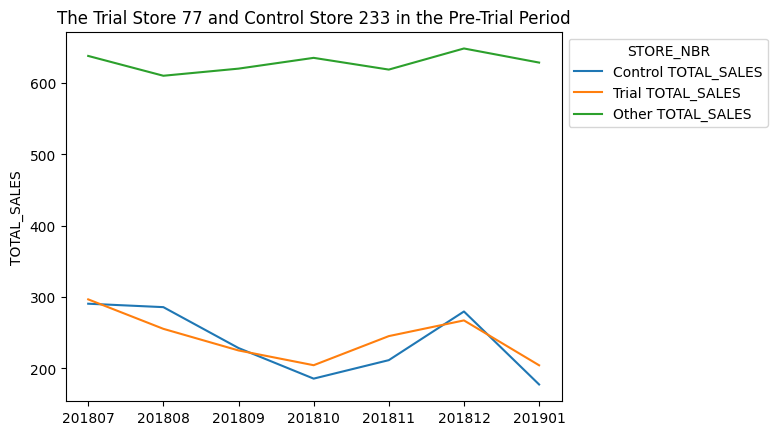

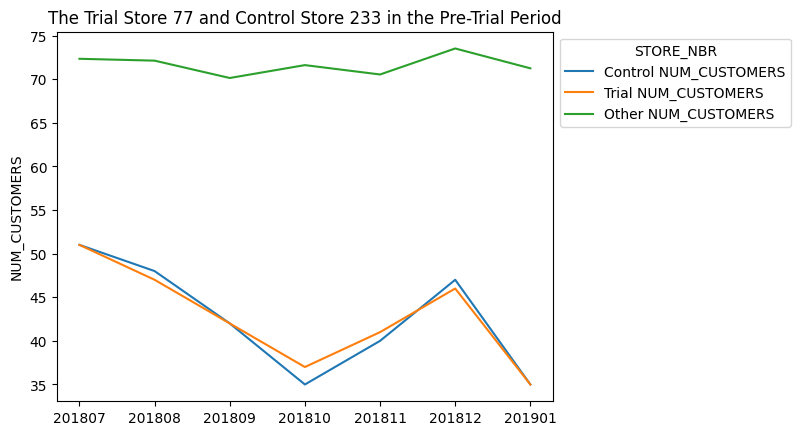

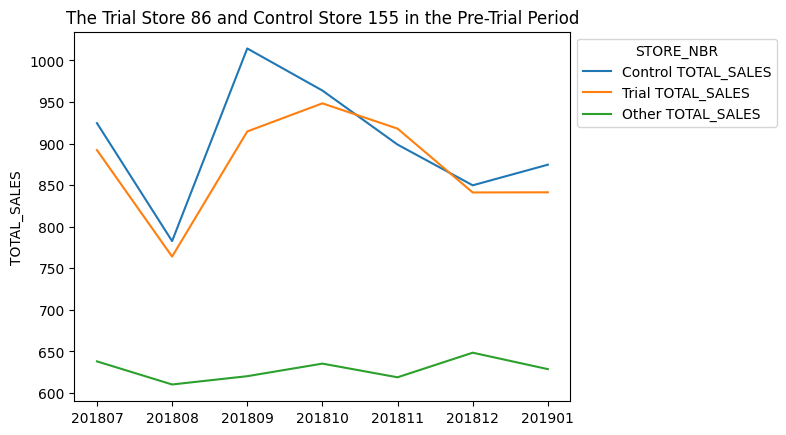

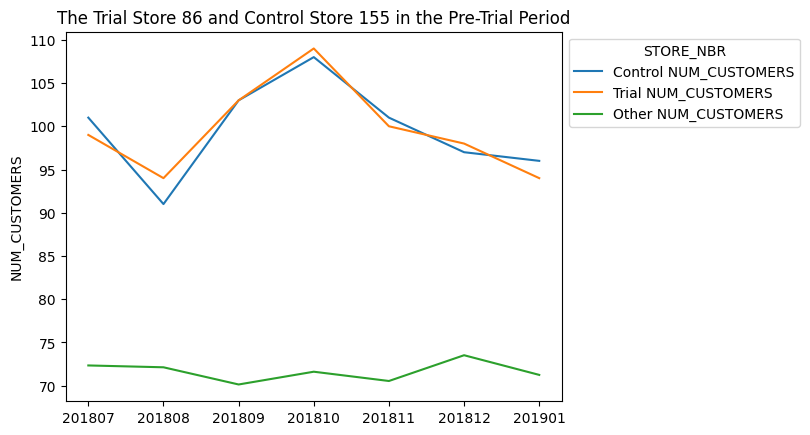

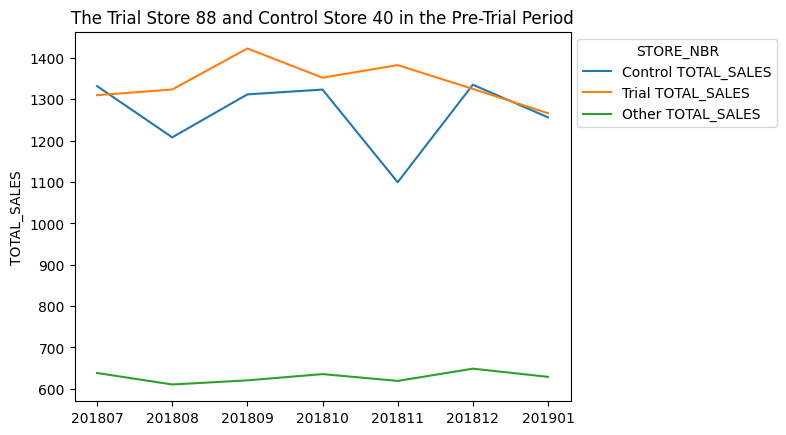

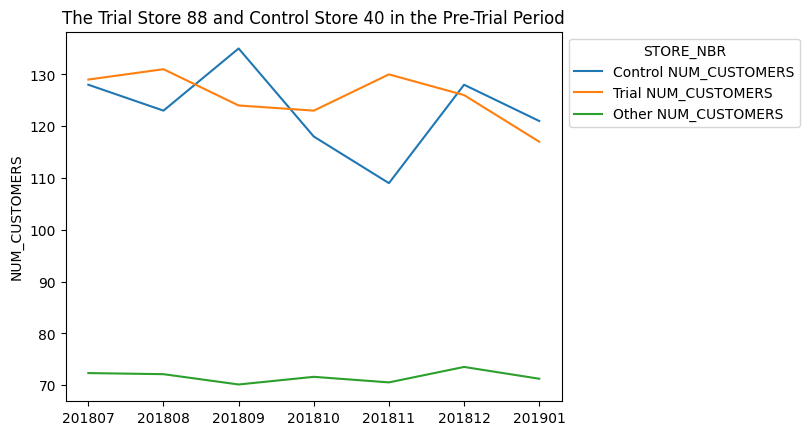

In [35]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['TOTAL_SALES', 'NUM_CUSTOMERS']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

Check if there has been an uplift in overall chip sales.

In [36]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['TOTAL_SALES'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['TOTAL_SALES'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['TOTAL_SALES'].sum()

In [38]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control233.TOTAL_SALES *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control155.TOTAL_SALES *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control40.TOTAL_SALES *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'TOTAL_SALES':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'})
scaledsales_control_trial = scaledsales_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialsales_trial = trialsales[(trialsales.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

Calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [39]:
# Percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'TOTAL_SALES']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,297.565550,77,296.8,-0.002576
1,233,201808,292.652187,77,255.5,-0.135554
2,233,201809,233.998916,77,225.2,-0.038323
3,233,201810,190.085733,77,204.5,0.073060
4,233,201811,216.597421,77,245.3,0.124281


Test with a null hypothesis that there is a 0-percent between the trial and control stores.

In [40]:
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()
dof = 6

for stores in storepair:
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['sales_percent_diff'].agg('std')
    mean =  pretrial['sales_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['sales_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()

print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.7171038288055838
201903  :  3.035317928855674
201904  :  4.708944418758219

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  1.4133618775921597
201903  :  7.123063846042147
201904  :  0.8863824572944234

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.5481633746817577
201903  :  1.0089992743637823
201904  :  0.9710006270463672

95th percentile value: 1.9431802805153022


The increase in sales in the trial store 77 in March and April is statistically greater than in the control store. This can also be seen for March of trial store 86.

Plot the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

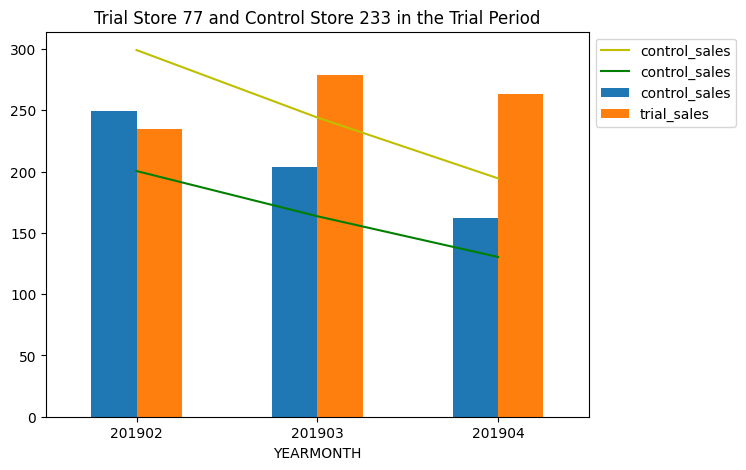

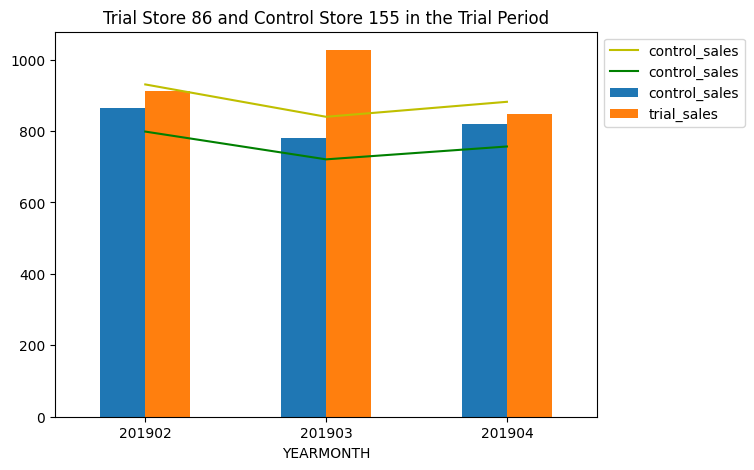

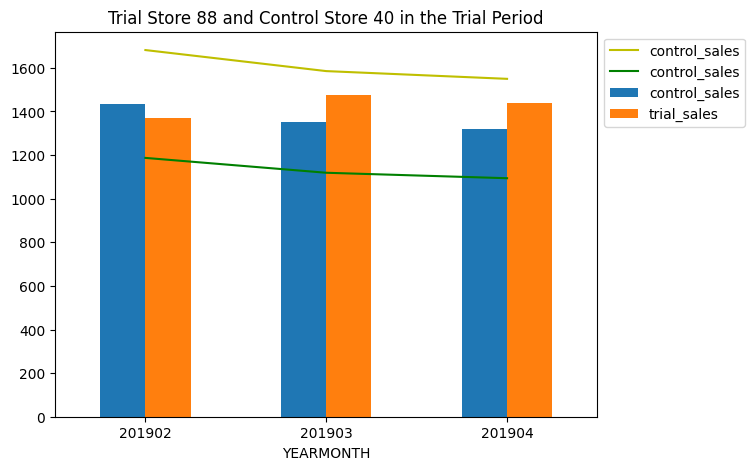

In [41]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]

    # Bar chart of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["YEARMONTH", "control_sales"]].merge(plot_trial[["YEARMONTH", "trial_sales"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)

    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

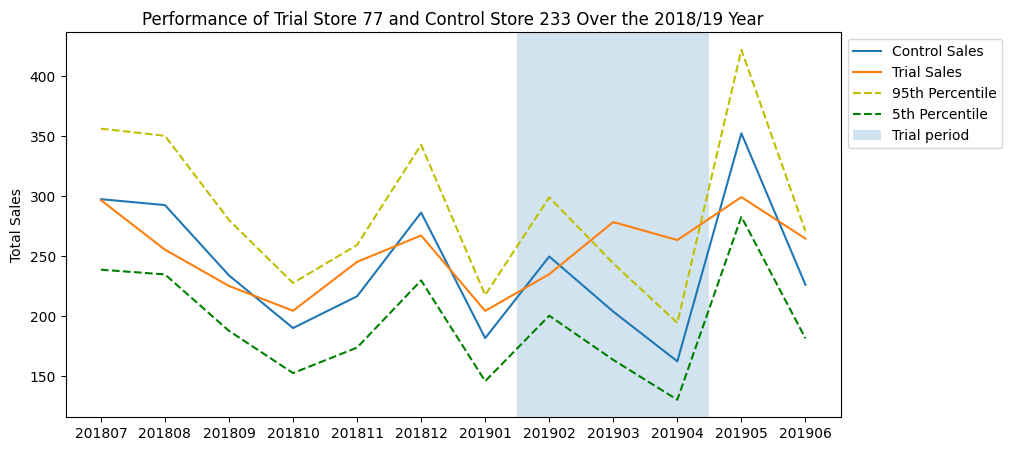

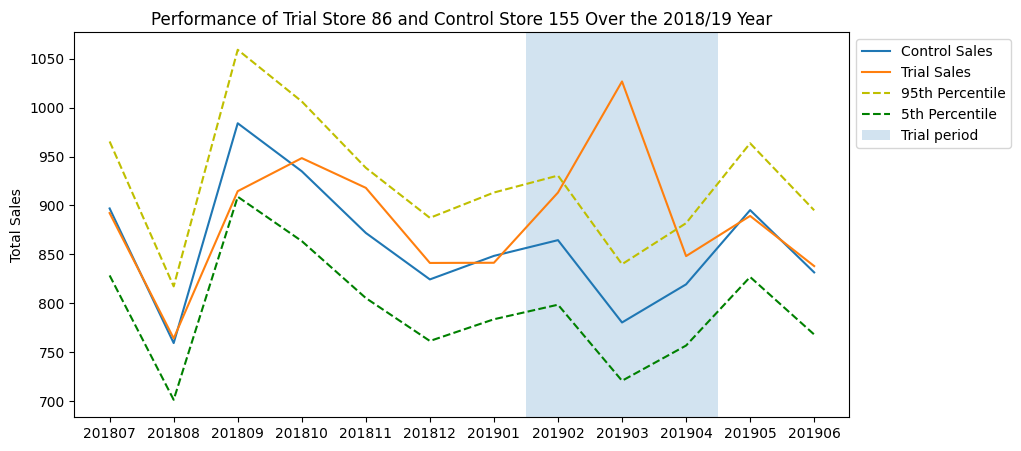

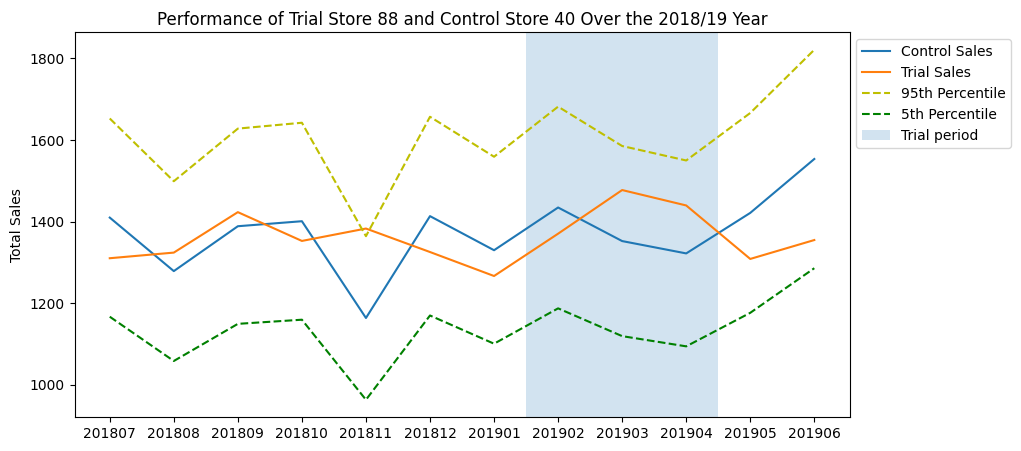

In [42]:
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]

    # Line graph of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

Store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

For store 86, the trial in March is significantly different to the control store with the total sales performance outside of the 5% to 95% confidence interval. However, there is no significant difference in February's and April's performance.

The results for store 88 show no significant difference between the trial and control stores during this period.


Assess these for number of customers as well.

In [43]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['NUM_CUSTOMERS'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['NUM_CUSTOMERS'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['NUM_CUSTOMERS'].sum()

In [44]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control233.NUM_CUSTOMERS *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control155.NUM_CUSTOMERS *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control40.NUM_CUSTOMERS *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'n_cust':'scaled_n_cust', 'STORE_NBR': 'CONTROL_NBR'})
# Get the trial period of scaled control stores
scaledncust_control_trial = scaledncust_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialncust = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialncust_trial = trialncust[(trialncust.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [48]:
# Percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'NUM_CUSTOMERS']]
percentdiff = percentdiff.rename(columns = {'NUM_CUSTOMERS' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,51.171141,77,51,-0.003350
1,233,201808,48.161074,77,47,-0.024402
2,233,201809,42.140940,77,42,-0.003350
3,233,201810,35.117450,77,37,0.052208
4,233,201811,40.134228,77,41,0.021342


In [49]:
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()
dof = 6

for stores in storepair:
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['cust_percent_diff'].agg('std')
    mean =  pretrial['cust_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['cust_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()

print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.19886295797440687
201903  :  8.009609025380932
201904  :  16.114474772873923

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  6.220524882227514
201903  :  10.52599074274189
201904  :  3.0763575852842706

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.3592881735131531
201903  :  1.2575196020616801
201904  :  0.6092905590514273

95th percentile value: 1.9431802805153022


There are statistically significant increases in the number of customers in stores 77 and 86 in at least 2 months during the trial period. However, there is no significant increase in store 88.

Plot the number of customers of the control store, the number of customers of the trial stores and the 95th percentile value of number of customers of the control store.

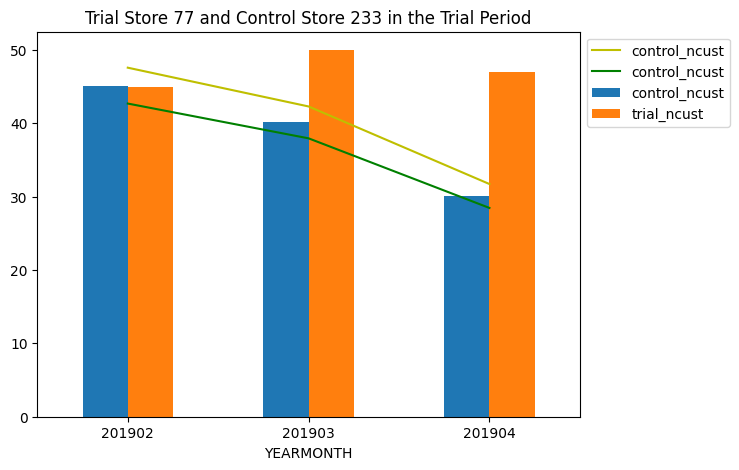

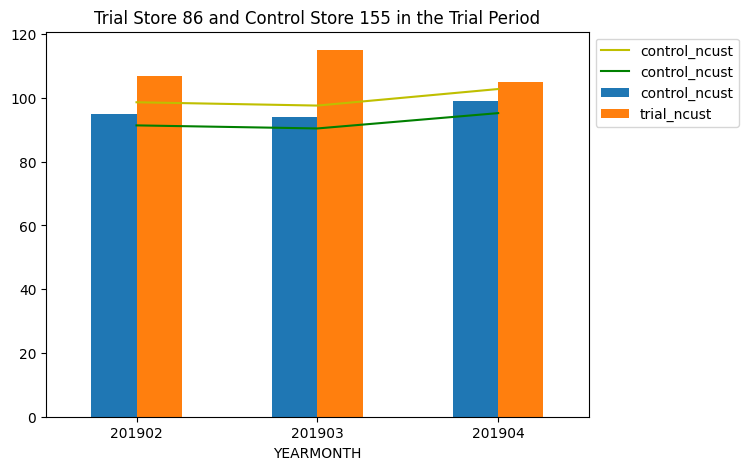

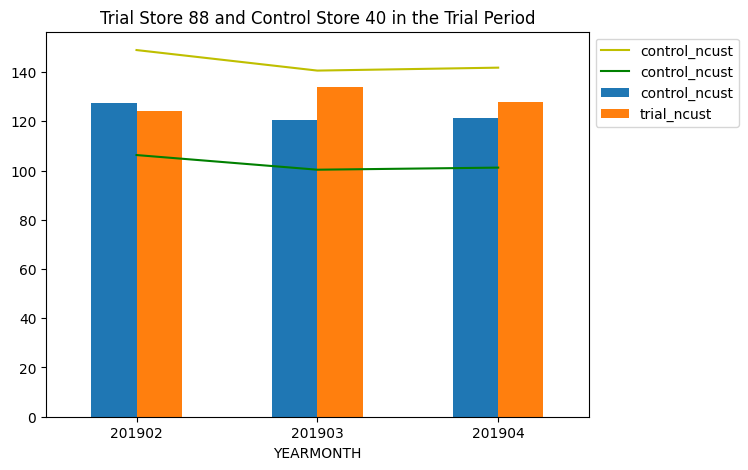

In [50]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["YEARMONTH", "control_ncust"]].merge(plot_trial[["YEARMONTH", "trial_ncust"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)

    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

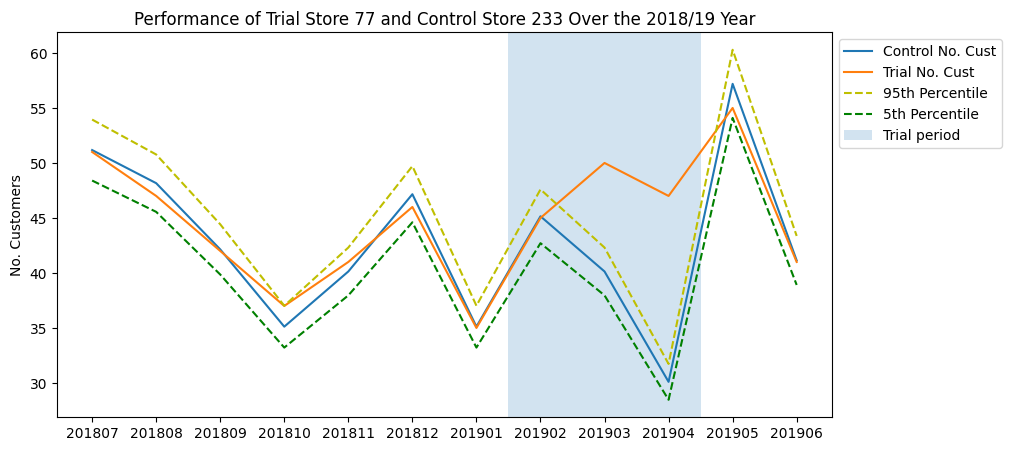

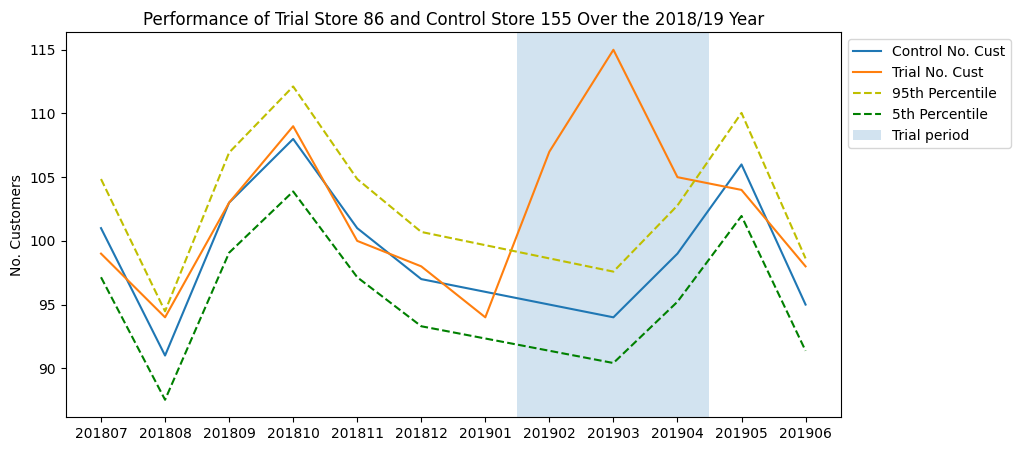

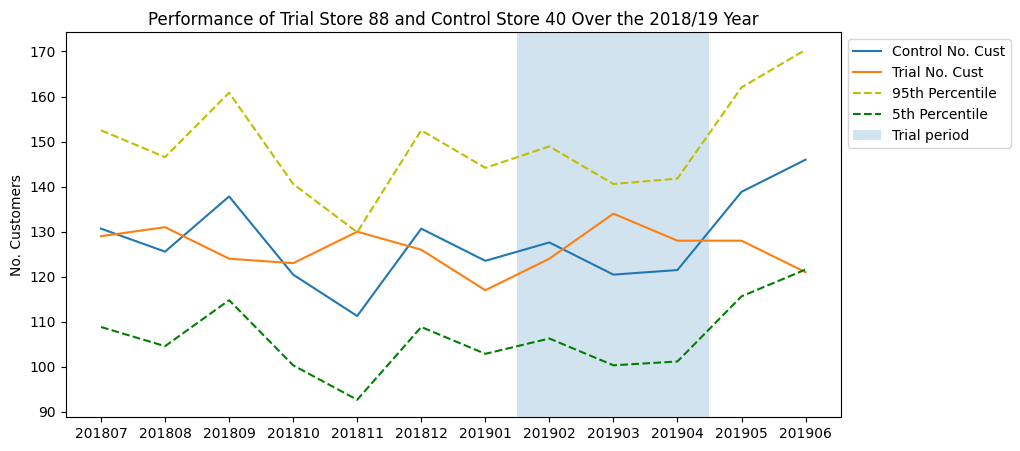

In [51]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')

    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

The number of customers was significantly higher across all three months in stores 77 and 86. This suggests that the trial had a notable impact on increasing customer numbers in trial store 86. However, as observed, the increase in total sales for store 86 was not as statistically significant compared to store 77. It would be helpful to consult the Category Manager to determine if any special deals in the trial store may have led to lower prices, potentially influencing the results.

In contrast, for store 88, there does not appear to be a significant difference in customer numbers between the control and trial stores during the trial period.

# Conclusion

In this task, we observed that trial stores 77 and 86 demonstrated a statistically significant difference in at least two of the three months during the trial period. However, this was not the case for store 88. It may be worth investigating whether the trial was implemented differently in store 88. Despite this, the trial has clearly shown a significant increase in sales overall.